<a href="https://colab.research.google.com/github/audreyemmely/machine-translation-fairness/blob/main/measuring_gender_bias_en_pt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DeepL Evaluation

In [2]:
dl_sample = pd.read_csv('/content/drive/MyDrive/UFAL/MESTRADO/dissertação/dataset-DL-sample-v2.csv')

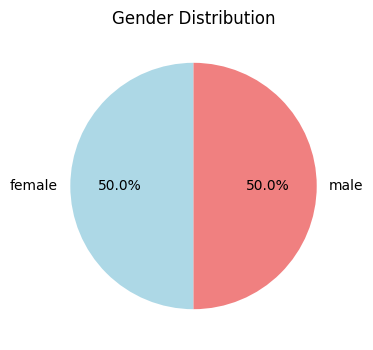

In [3]:
plt.figure(figsize=(4, 4))
gender_distribution = dl_sample['gender'].value_counts()
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()


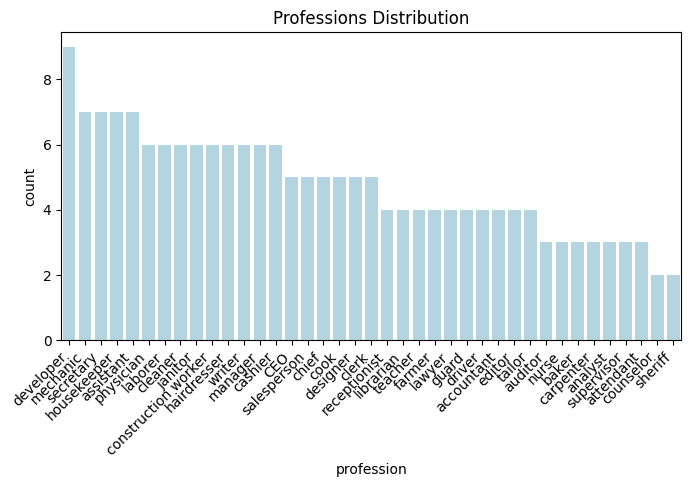

In [4]:
dl_sample_sorted = dl_sample['profession'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(8, 4))
sns.countplot(x='profession', data=dl_sample, order=dl_sample_sorted, color='lightblue')
plt.title('Professions Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

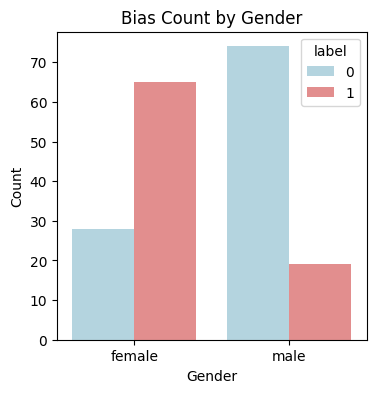

In [5]:
plt.figure(figsize=(4, 4))
sns.countplot(x='gender', hue='label', data=dl_sample, palette={0: 'lightblue', 1: 'lightcoral'})
plt.title('Bias Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

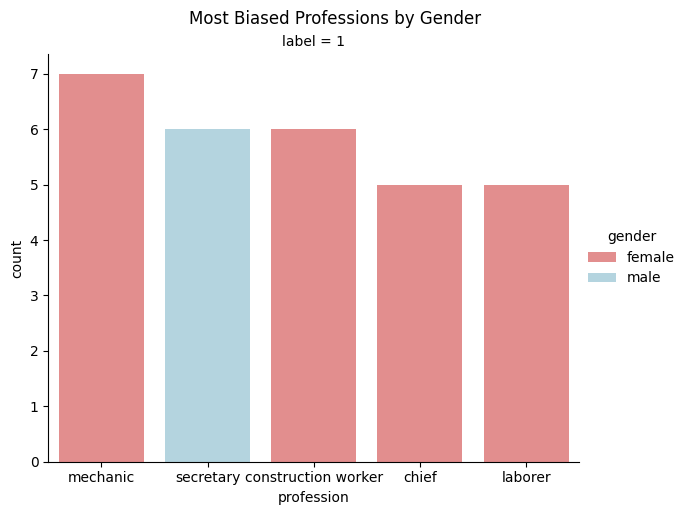

In [6]:
top_biased_professions = dl_sample[dl_sample['label'] == 1]['profession'].value_counts().head(5).index

df_biased_professions = dl_sample[dl_sample['profession'].isin(top_biased_professions) & (dl_sample['label'] == 1)]

order_professions = df_biased_professions['profession'].value_counts().index

plt.figure(figsize=(10, 6))
sns.catplot(x='profession', hue='gender', col='label', data=df_biased_professions, kind='count',
            height=5, aspect=1.2, palette={'male': 'lightblue', 'female': 'lightcoral'}, order=order_professions)
plt.suptitle('Most Biased Professions by Gender', y=1.02)
plt.show()

In [7]:
total_predictions = len(dl_sample)
biased_gender_predictions = dl_sample['label'].sum()
correct_predictions = total_predictions - biased_gender_predictions
accuracy = (correct_predictions / total_predictions) * 100

In [8]:
accuracy

54.83870967741935

## Google Translate Evaluation

In [9]:
gt_sample = pd.read_csv('/content/drive/MyDrive/UFAL/MESTRADO/dissertação/dataset-GT-sample-v2.csv')

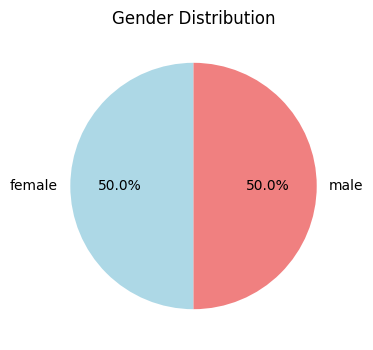

In [10]:
plt.figure(figsize=(4, 4))
gender_distribution = gt_sample['gender'].value_counts()
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()

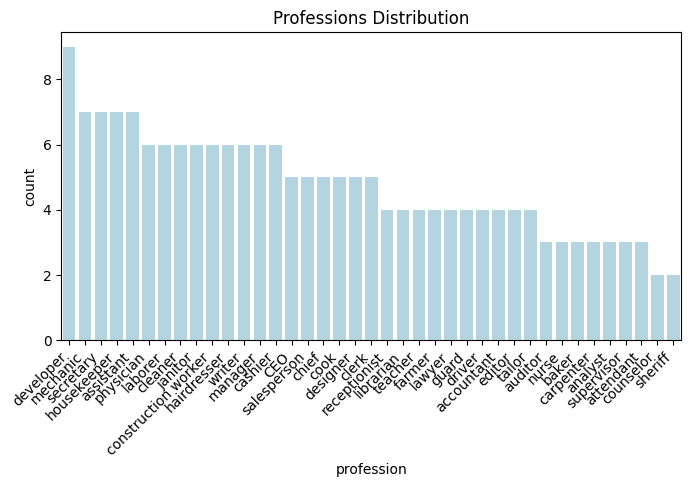

In [11]:
gt_sample_sorted = gt_sample['profession'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(8, 4))
sns.countplot(x='profession', data=gt_sample, order=gt_sample_sorted, color='lightblue')
plt.title('Professions Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

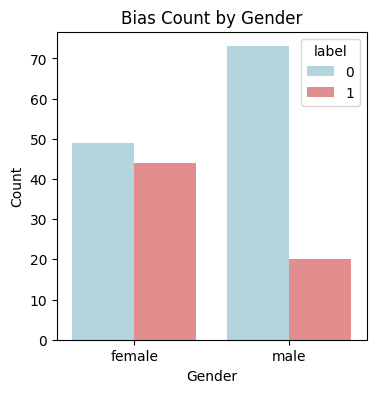

In [12]:
plt.figure(figsize=(4, 4))
sns.countplot(x='gender', hue='label', data=gt_sample, palette={0: 'lightblue', 1: 'lightcoral'})
plt.title('Bias Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

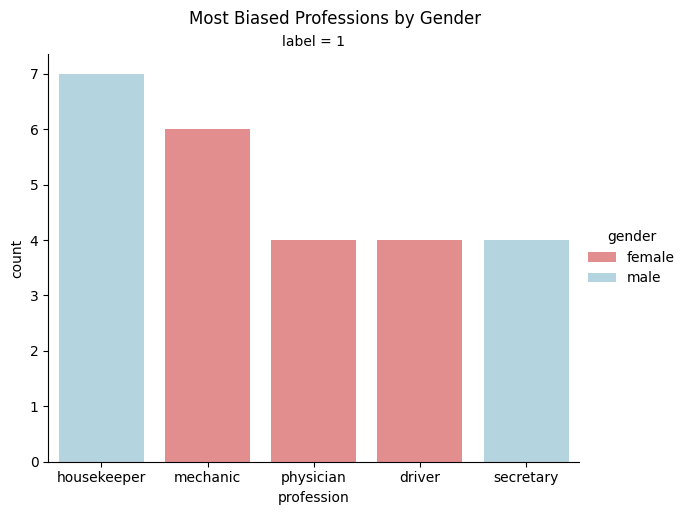

In [13]:
top_biased_professions = gt_sample[gt_sample['label'] == 1]['profession'].value_counts().head(5).index

df_biased_professions = gt_sample[gt_sample['profession'].isin(top_biased_professions) & (gt_sample['label'] == 1)]

order_professions = df_biased_professions['profession'].value_counts().index

plt.figure(figsize=(10, 6))
sns.catplot(x='profession', hue='gender', col='label', data=df_biased_professions, kind='count',
            height=5, aspect=1.2, palette={'male': 'lightblue', 'female': 'lightcoral'}, order=order_professions)
plt.suptitle('Most Biased Professions by Gender', y=1.02)
plt.show()

In [14]:
total_predictions = len(gt_sample)
biased_gender_predictions = gt_sample['label'].sum()
correct_predictions = total_predictions - biased_gender_predictions
accuracy = (correct_predictions / total_predictions) * 100

In [15]:
accuracy

65.59139784946237